## Comparative Genomic Analysis: Identifying and Characterizing Single Nucleotide Polymorphisms (SNPs) in DNA Sequences

Project is focused on bioinformatics, specifically on analyzing genetic sequences to identify single nucleotide polymorphisms (SNPs) between two DNA sequences. Here's a summary of the key aspects of your project:

1. Reading Sequences: You're using Biopython's SeqIO module to read DNA sequences from FASTA files.

2. Aligning Sequences: You're using Biopython's PairwiseAligner to align two DNA sequences, ensuring that corresponding nucleotides are matched up for comparison.

3. Identifying SNPs: You're comparing the aligned sequences to identify positions where the nucleotides differ, which are the SNPs. These differences are potential indicators of genetic variation between the two sequences.

4. Analyzing SNPs: You're performing various analyses on the identified SNPs, including:
   - Plotting the distribution of SNPs along the sequence.
   - Calculating the frequency of different types of SNP changes (e.g., A->G, C->T).
   - (Planned) Calculating SNP density, transition/transversion ratio, conservation scores, and identifying sequence motifs around SNPs.

Overall, your project aims to provide insights into genetic variations between two DNA sequences, which can be useful in various biological and medical research areas, such as understanding genetic diversity, disease susceptibility, and evolutionary relationships.

In [ ]:
!pip install biopython

In [ ]:
!pip install biopython prettytable colorama

In [75]:
from Bio import SeqIO

# Load DNA sequences
seq1 = SeqIO.read("/content/sequence_1.fasta", "fasta")
seq2 = SeqIO.read("/content/sequence_2.fasta", "fasta")

# Print basic information
print(f"Sequence 1 length: {len(seq1)}")
print(f"Sequence 2 length: {len(seq2)}")

Sequence 1 length: 57381
Sequence 2 length: 19070


In [78]:
from Bio.Seq import MutableSeq, Seq

# Convert Seq object to MutableSeq for mutation
seq1_mutable = MutableSeq(seq1.seq)
seq2_mutable = MutableSeq(seq2.seq)

# Replace 'N' with 'A' (or any other base as required)
seq1_mutable = seq1_mutable.replace("N", "A")
seq2_mutable = seq2_mutable.replace("N", "A")

# Convert back to immutable Seq object
seq1.seq = Seq(str(seq1_mutable))
seq2.seq = Seq(str(seq2_mutable))

# Print updated sequences
print(f"Updated Sequence 1: {seq1.seq[:100]}...")  # Printing first 100 bases for brevity
print(f"Updated Sequence 2: {seq2.seq[:100]}...")

Updated Sequence 1: GTGAGCACGAGGCACTGAGGTGATTGGCTGAAGGCACTTCCGTTGAGCATCTAGACGTTTCCTTGGCTCTTCTGGCGCCAAAATGTCGTTCGTGGCAGGG...
Updated Sequence 2: CTCAAAAGTCTAGAGCCACCGTCCAGGGAGCAGGTAGCTGCTGGGCTCCGGGGACACTTTGCGTTCGGGCTGGGAGCGTGCTTTCCACGACGGTGACACG...


In [ ]:
from Bio import SeqIO
from Bio.Align import PairwiseAligner
from Bio import AlignIO
import matplotlib.pyplot as plt

def read_sequences(file_path):
    """Reads sequences from a FASTA file."""
    return [record.seq for record in SeqIO.parse(file_path, "fasta")]

def align_sequences(seq1, seq2):
    """Aligns two sequences."""
    aligner = PairwiseAligner()
    alignment = aligner.align(seq1, seq2)[0]  # Align the full sequences
    return alignment

def print_alignment(alignment):
    """Prints the alignment in a readable format."""
    align_length = len(alignment)
    lines = []

    # Print the sequences in blocks of 60 characters
    block_size = 60
    for i in range(0, align_length, block_size):
        seq1_block = alignment[0, i:i + block_size]
        seq2_block = alignment[1, i:i + block_size]
        middle_line = ''.join('|' if seq1_block[j] == seq2_block[j] else ' ' for j in range(len(seq1_block)))
        lines.append(f"{seq1_block}\n{middle_line}\n{seq2_block}\n")

    alignment_str = '\n'.join(lines)
    print(alignment_str)

# File paths to your FASTA files
file_path_1 = "/content/sequence_1.fasta"
file_path_2 = "/content/sequence_2.fasta"

# Read sequences from the FASTA files
seq1 = read_sequences(file_path_1)[0]
seq2 = read_sequences(file_path_2)[0]

# Align the sequences
alignment = align_sequences(seq1, seq2)

# Print the alignment
print_alignment(alignment)


G-TGAGCACGAGGCACTGAGGTGATTGGCTGAAGGCACTTCCGTTGAGCATCTAGACGTT
  |   ||  |   |   || |      || | |  |     |     |  | |  |   
-CT---CA--A---A---AG-T------CT-A-G--A-----G-----C--C-A--C---



SNPs found: 753


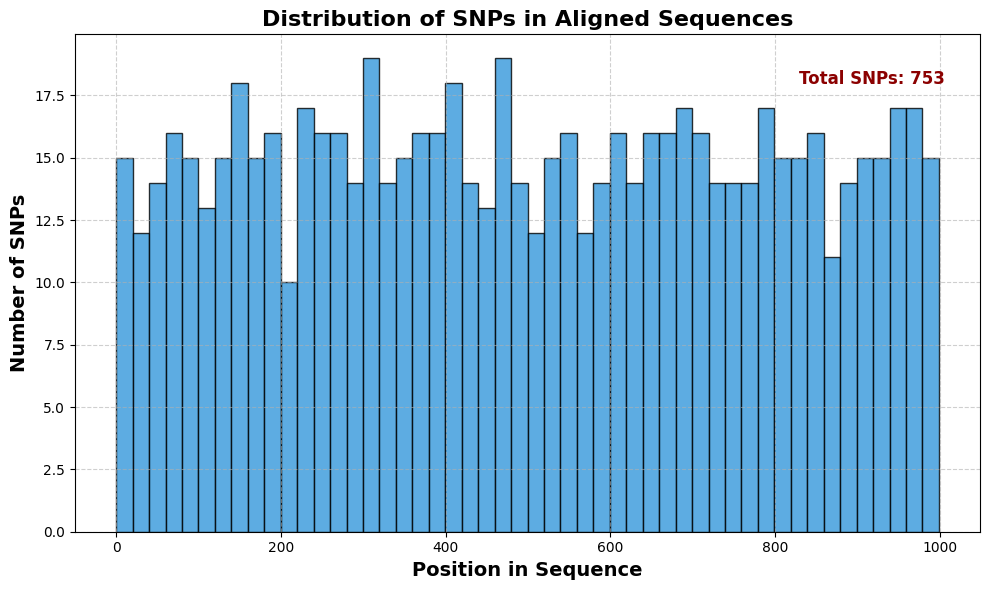

In [ ]:
from Bio import SeqIO
from Bio.Align import PairwiseAligner
import numpy as np
import matplotlib.pyplot as plt

def read_sequences(file_path):
    return [record.seq for record in SeqIO.parse(file_path, "fasta")]

def align_and_identify_snps(seq1, seq2, alignment_length=1000):
    aligner = PairwiseAligner()
    alignments = aligner.align(seq1[:alignment_length], seq2[:alignment_length])  # Align specified base pairs
    best_alignment = alignments[0]
    snps = []
    for i in range(len(seq1[:alignment_length])):
        if seq1[i] != seq2[i]:
            snps.append((i, seq1[i], seq2[i]))
    return snps

# Read sequences
seq1 = read_sequences("/content/sequence_1.fasta")[0]
seq2 = read_sequences("/content/sequence_2.fasta")[0]

# Align and identify SNPs
alignment_length = 1000  # Specify the number of base pairs to align
snps = align_and_identify_snps(seq1, seq2, alignment_length)
print(f"SNPs found: {len(snps)}")

# Plotting the distribution of SNPs with enhanced aesthetics
plt.figure(figsize=(10, 6))
positions = [pos for pos, _, _ in snps]
plt.hist(positions, bins=50, color='#3498db', edgecolor='black', alpha=0.8)

# Aesthetic Enhancements
plt.xlabel('Position in Sequence', fontsize=14, fontweight='bold')
plt.ylabel('Number of SNPs', fontsize=14, fontweight='bold')
plt.title('Distribution of SNPs in Aligned Sequences', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)

# Annotate SNP counts
plt.annotate(f'Total SNPs: {len(snps)}', xy=(0.8, 0.9), xycoords='axes fraction',
             fontsize=12, fontweight='bold', color='darkred')

# Show the plot
plt.tight_layout()
plt.show()

In [19]:
from Bio import SeqIO
from prettytable import PrettyTable
from colorama import Fore, Style, init

# Initialize colorama
init(autoreset=True)

def find_snps(seq1, seq2):
    """Finds SNPs between two sequences, handling different lengths."""
    snps = []
    min_length = min(len(seq1), len(seq2))  # Find the length of the shorter sequence
    for i in range(min_length):
        if seq1[i] != seq2[i]:
            snps.append((i + 1, seq1[i], seq2[i]))  # +1 to convert to 1-based indexing
    return snps

# Read sequences from FASTA files
def read_sequences(file_path):
    """Reads sequences from a FASTA file."""
    return [record.seq for record in SeqIO.parse(file_path, "fasta")]

# File paths to your FASTA files
seq1 = read_sequences("/content/sequence_1.fasta")[0]
seq2 = read_sequences("/content/sequence_2.fasta")[0]

# Find SNPs between the two sequences
snps = find_snps(seq1, seq2)

# Print SNPs in a table format
if snps:
    table = PrettyTable()
    table.field_names = ["Position", "Sequence 1 Base", "Sequence 2 Base"]

    for snp in snps:
        pos, base1, base2 = snp
        colored_base1 = f"{Fore.RED}{base1}{Style.RESET_ALL}"
        colored_base2 = f"{Fore.GREEN}{base2}{Style.RESET_ALL}"
        table.add_row([pos, colored_base1, colored_base2])

    print(table)
else:
    print("No SNPs found between the sequences.")


Streaming output truncated to the last 5000 lines.
|  12372   |        A        |        C        |
|  12373   |        C        |        A        |
|  12374   |        C        |        G        |
|  12376   |        G        |        C        |
|  12378   |        A        |        C        |
|  12380   |        C        |        G        |
|  12381   |        T        |        C        |
|  12383   |        T        |        C        |
|  12384   |        T        |        A        |
|  12385   |        C        |        T        |
|  12386   |        C        |        G        |
|  12387   |        T        |        A        |
|  12389   |        T        |        G        |
|  12390   |        C        |        G        |
|  12391   |        T        |        A        |
|  12392   |        A        |        G        |
|  12393   |        A        |        G        |
|  12394   |        A        |        T        |
|  12395   |        G        |        T        |
|  12396   |      

**SNP Frequency Distribution: Calculate the frequency of each SNP (e.g., how often each nucleotide change occurs) and plot the distribution.**

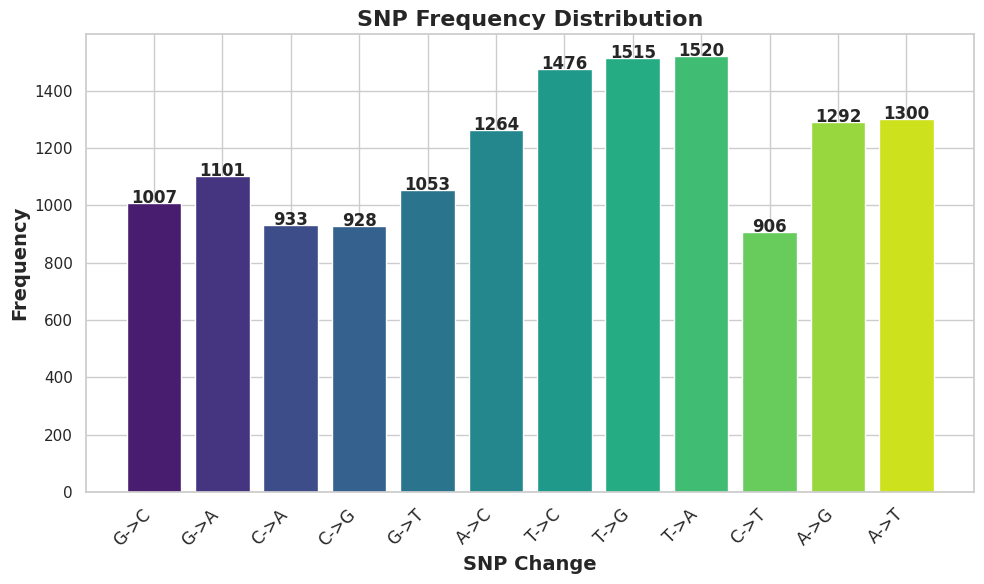

In [20]:
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Assuming `snps` is already defined from previous steps

# Prepare data for SNP frequency distribution
snp_changes = [f"{old}->{new}" for _, old, new in snps]
change_counts = Counter(snp_changes)

# Set the plot style and color palette
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(change_counts.keys(), change_counts.values(), color=sns.color_palette("viridis", len(change_counts)))

# Add titles and labels
plt.xlabel('SNP Change', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('SNP Frequency Distribution', fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', fontsize=12, fontweight='bold')

# Show the plot with tight layout
plt.tight_layout()
plt.show()

**SNP Density: Calculate the density of SNPs in different regions of the sequences (e.g., SNPs per 100 base pairs) and plot this density along the sequence.**

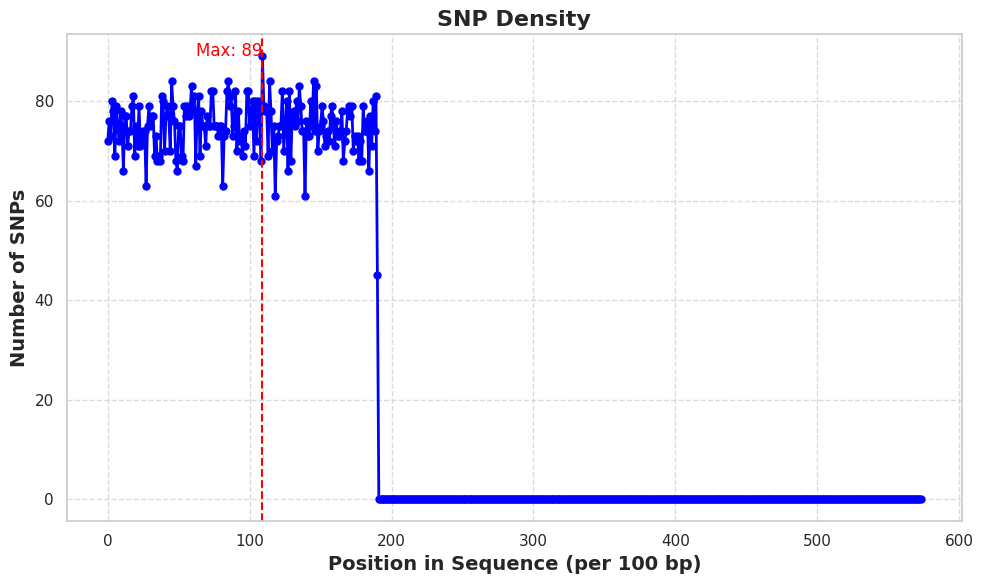

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `snps` and `seq1` are already defined from previous steps

# Parameters
window_size = 100  # Adjust based on your preference

# Calculate SNP density
density = [0] * (len(seq1) // window_size + 1)
for pos, _, _ in snps:
    density[pos // window_size] += 1

# Set the plot style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(density, color='blue', linewidth=2, marker='o', markersize=5)

# Add titles and labels
plt.xlabel(f'Position in Sequence (per {window_size} bp)', fontsize=14, fontweight='bold')
plt.ylabel('Number of SNPs', fontsize=14, fontweight='bold')
plt.title('SNP Density', fontsize=16, fontweight='bold')

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Highlight maximum density region
max_density = max(density)
max_index = density.index(max_density)
plt.axvline(x=max_index, color='red', linestyle='--', linewidth=1.5)
plt.text(max_index, max_density, f'Max: {max_density}', fontsize=12, color='red', ha='right')

# Tight layout
plt.tight_layout()
plt.show()

**Transition/Transversion Ratio: Calculate the ratio of transitions (purine to purine or pyrimidine to pyrimidine substitutions) to transversions (purine to pyrimidine or vice versa substitutions). This ratio can provide insights into the nature of the mutations.**

In [25]:
#Transition/Transversion Ratio
transitions = sum(1 for _, old, new in snps if old+new in ['AG', 'GA', 'CT', 'TC'])
transversions = len(snps) - transitions
ratio = transitions / transversions if transversions > 0 else float('inf')
print(f"Transition/Transversion Ratio: {ratio}")

Transition/Transversion Ratio: 0.5015756302521008


**Conservation Score: Calculate a conservation score for each position in the sequence based on the frequency of the most common nucleotide at that position.**

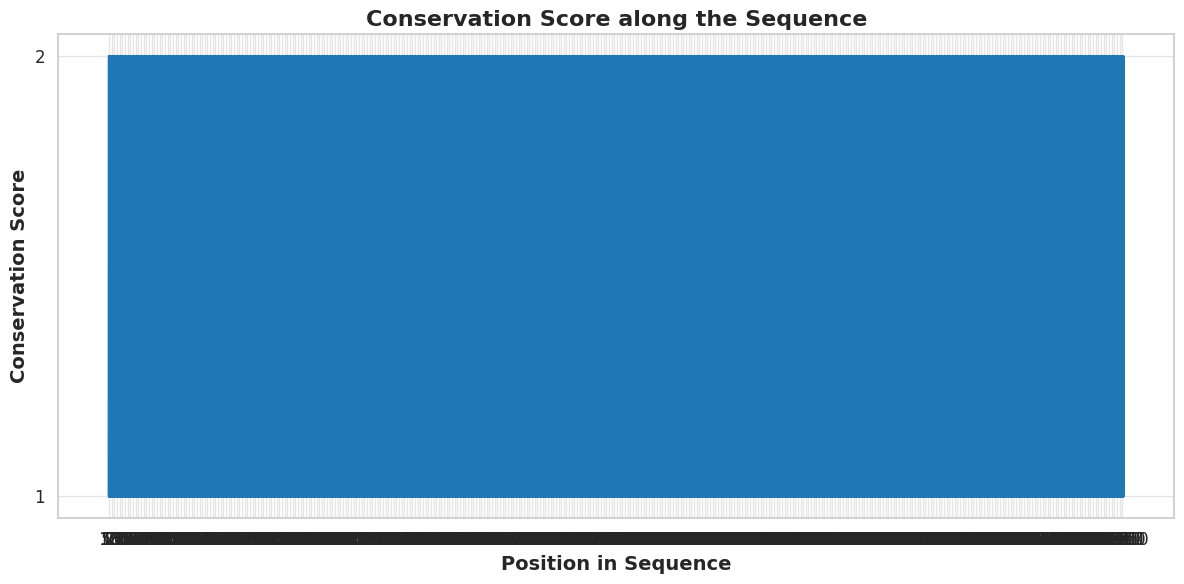

In [32]:
from Bio import SeqIO
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Function to read sequences from a FASTA file
def read_sequences(file_path):
    """Reads the first sequence from a FASTA file."""
    with open(file_path, "r") as file:
        seq = str(next(SeqIO.parse(file, "fasta")).seq)
    return seq

# Paths to your FASTA files
file_path_1 = "/content/sequence_1.fasta"
file_path_2 = "/content/sequence_2.fasta"

# Reading the sequences from the FASTA files
seq1 = read_sequences(file_path_1)
seq2 = read_sequences(file_path_2)

# Ensure both sequences are of the same length
min_length = min(len(seq1), len(seq2))

# Calculate Conservation Scores
conservation_scores = []
for i in range(min_length):
    conservation_scores.append(max(Counter([seq1[i], seq2[i]]).values()))

# Set the plot style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(conservation_scores, color='#1f77b4', linewidth=2)

# Add titles and labels with enhanced styling
plt.xlabel('Position in Sequence', fontsize=14, fontweight='bold')
plt.ylabel('Conservation Score', fontsize=14, fontweight='bold')
plt.title('Conservation Score along the Sequence', fontsize=16, fontweight='bold')

# Customize ticks for better readability
plt.xticks(ticks=range(0, min_length, 50), fontsize=12)
plt.yticks(ticks=range(1, max(conservation_scores) + 1), fontsize=12)

# Add grid lines for better readability
plt.grid(True, linestyle='-', alpha=0.5)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

**Sequence Motifs: Look for common sequence motifs around the SNP positions to see if there are any patterns that might be biologically significant.**

In [33]:
#Sequence Motifs
motif_length = 5  # Adjust based on your preference
motifs = []
for pos, _, _ in snps:
    start = max(0, pos - motif_length // 2)
    end = min(len(seq1), pos + motif_length // 2 + 1)
    motifs.append(seq1[start:end])
motif_counts = Counter(motifs)
print(f"Most common motifs around SNPs: {motif_counts.most_common(5)}")

Most common motifs around SNPs: [('TTTTT', 199), ('AAAAA', 103), ('AAAAT', 69), ('ATTTT', 68), ('TATTT', 54)]


**GC Content Calculation: GC content refers to the proportion of guanine (G) and cytosine (C) nucleotides in a DNA sequence. It's an important metric in genetics as it can affect various biological processes.**

In [34]:
# GC Content Calculation
def calculate_gc_content(sequence):
    gc_count = sequence.count('G') + sequence.count('C')
    gc_content = gc_count / len(sequence)
    return gc_content

gc_content_seq1 = calculate_gc_content(seq1)
gc_content_seq2 = calculate_gc_content(seq2)
print(f"GC content of sequence 1: {gc_content_seq1}")
print(f"GC content of sequence 2: {gc_content_seq2}")

GC content of sequence 1: 0.41879716282393126
GC content of sequence 2: 0.49375983219716835


**Identifying Indels (Insertions and Deletions): In addition to SNPs, identifying insertions and deletions can be crucial as they can lead to frameshift mutations and alter protein coding sequences.**

In [36]:
seq1 = read_sequences("/content/sequence_1.fasta")[0]
seq2 = read_sequences("/content/sequence_2.fasta")[0]
# Identifying Indels
def identify_indels(seq1, seq2):
    indels = []
    for i in range(len(seq1)):
        if seq1[i] != seq2[i]:
            if seq1[i] == '-' or seq2[i] == '-':
                indels.append((i, seq1[i], seq2[i]))
    return indels

indels = identify_indels(seq1, seq2)
print(f"Indels found: {len(indels)}")

Indels found: 0


**Codon Usage Analysis: Analyzing the codon usage can shed light on the evolutionary patterns and functional aspects of genes.**

In [45]:
from Bio import SeqIO
from collections import Counter
from prettytable import PrettyTable
from colorama import Fore, Style

# Load your sequence data (replace 'sequence 1.fasta' and 'sequence 2.fasta' with your file names)
seq1 = SeqIO.read("/content/sequence_1.fasta", "fasta")
seq2 = SeqIO.read("/content/sequence_2.fasta", "fasta")

# Initialize a dictionary to store codon frequencies
codon_frequencies = Counter()

# Iterate over each sequence
for record in [seq1, seq2]:
    # Get the sequence
    sequence = str(record.seq)
    # Iterate over each codon in the sequence
    for i in range(0, len(sequence), 3):
        codon = sequence[i:i+3]
        if len(codon) == 3:  # Ensure it's a complete codon
            # Increment the count of the codon
            codon_frequencies[codon] += 1

# Total codon count
total_codons = sum(codon_frequencies.values())

# Sort codons alphabetically for better readability
sorted_codons = sorted(codon_frequencies.items())

# Create a pretty table for output
table = PrettyTable()
table.field_names = [Fore.GREEN + "Codon" + Style.RESET_ALL,
                     Fore.YELLOW + "Count" + Style.RESET_ALL,
                     Fore.CYAN + "Frequency" + Style.RESET_ALL]

# Add rows to the table
for codon, count in sorted_codons:
    frequency = count / total_codons
    table.add_row([Fore.GREEN + codon + Style.RESET_ALL,
                   Fore.YELLOW + str(count) + Style.RESET_ALL,
                   Fore.CYAN + f"{frequency:.4f}" + Style.RESET_ALL])

# Print the table
print(table)

+-------+-------+-----------+
| Codon | Count | Frequency |
+-------+-------+-----------+
|  AAA  |  797  |   0.0313  |
|  AAC  |  309  |   0.0121  |
|  AAG  |  446  |   0.0175  |
|  AAT  |  503  |   0.0197  |
|  ACA  |  432  |   0.0170  |
|  ACC  |  304  |   0.0119  |
|  ACG  |   62  |   0.0024  |
|  ACT  |  412  |   0.0162  |
|  AGA  |  564  |   0.0221  |
|  AGC  |  415  |   0.0163  |
|  AGG  |  523  |   0.0205  |
|  AGT  |  471  |   0.0185  |
|  ATA  |  400  |   0.0157  |
|  ATC  |  301  |   0.0118  |
|  ATG  |  429  |   0.0168  |
|  ATT  |  576  |   0.0226  |
|  CAA  |  361  |   0.0142  |
|  CAC  |  393  |   0.0154  |
|  CAG  |  597  |   0.0234  |
|  CAT  |  380  |   0.0149  |
|  CCA  |  473  |   0.0186  |
|  CCC  |  385  |   0.0151  |
|  CCG  |   96  |   0.0038  |
|  CCT  |  515  |   0.0202  |
|  CGA  |   76  |   0.0030  |
|  CGC  |   80  |   0.0031  |
|  CGG  |   97  |   0.0038  |
|  CGT  |   82  |   0.0032  |
|  CTA  |  333  |   0.0131  |
|  CTC  |  468  |   0.0184  |
|  CTG  | 

**Phylogenetic Analysis: Constructing a phylogenetic tree based on the aligned sequences can reveal evolutionary relationships between organisms.**

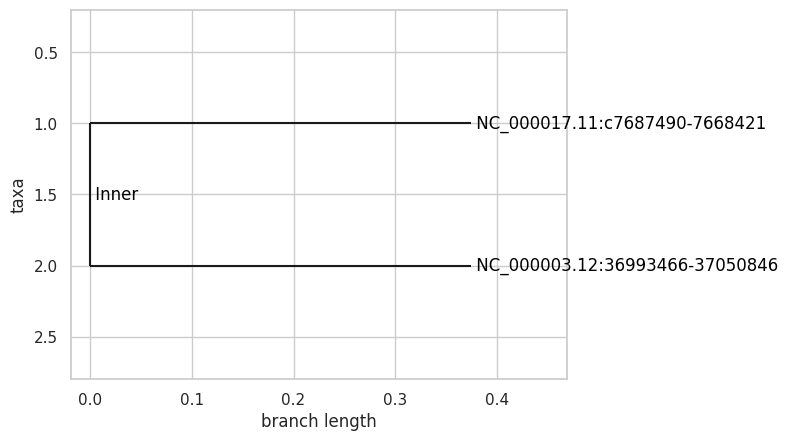

The phylogenetic tree has been successfully constructed.


In [60]:
from Bio import SeqIO, AlignIO
from Bio.Align import MultipleSeqAlignment
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio import Phylo

# Load your sequences
seq1 = SeqIO.read("/content/sequence_1.fasta", "fasta")
seq2 = SeqIO.read("/content/sequence_2.fasta", "fasta")

# Ensure the sequences are of the same length by trimming or padding
min_length = min(len(seq1), len(seq2))
seq1.seq = seq1.seq[:min_length]  # Trim to the length of the shorter sequence
seq2.seq = seq2.seq[:min_length]  # Trim to the length of the shorter sequence

# Align the sequences
alignment = MultipleSeqAlignment([seq1, seq2])

# Calculate the distance matrix
calculator = DistanceCalculator('identity')
distance_matrix = calculator.get_distance(alignment)

# Construct the tree
constructor = DistanceTreeConstructor(calculator)
tree = constructor.build_tree(alignment)

# Draw the tree (optional)
Phylo.draw(tree)

# Print a success message
print("The phylogenetic tree has been successfully constructed.")

**Genome-Wide Association Studies (GWAS): If you have SNP data from multiple individuals, you could perform GWAS to identify SNPs associated with specific traits or diseases.**

In [62]:
from Bio import SeqIO
import csv

def calculate_gc_content(sequence):
    gc_count = sequence.count('G') + sequence.count('C')
    gc_content = gc_count / len(sequence)
    return gc_content

def find_snps(seq1, seq2):
    snps = []
    for i in range(min(len(seq1), len(seq2))):
        if seq1[i] != seq2[i]:
            snps.append((i + 1, seq1[i], seq2[i]))
    return snps

def calculate_allele_frequency(sequence, allele):
    allele_count = sequence.count(allele)
    return allele_count / len(sequence)

def calculate_conservation_score():
    # Placeholder for conservation score calculation
    return 0.5

def calculate_transition_transversion(ref_allele, alt_allele):
    if ref_allele + alt_allele in ['AG', 'GA', 'CT', 'TC']:  # Transition
        return 1, 0
    else:  # Transversion
        return 0, 1

def determine_trait_status(position):
    # Placeholder for determining trait status
    # You can implement your own logic here based on position or other factors
    return "Trait Positive" if position % 2 == 0 else "Trait Negative"

def main():
    # Load sequences from FASTA files
    seq1_record = SeqIO.read("/content/sequence_1.fasta", "fasta")
    seq2_record = SeqIO.read("/content/sequence_2.fasta", "fasta")
    seq1 = str(seq1_record.seq)
    seq2 = str(seq2_record.seq)

    # Find SNPs between the sequences
    snps = find_snps(seq1, seq2)

    # Calculate GC content for both sequences
    gc_content_seq1 = calculate_gc_content(seq1)
    gc_content_seq2 = calculate_gc_content(seq2)

    # Prepare SNP data
    snp_data = []
    for snp in snps:
        position, ref_allele, alt_allele = snp
        ref_allele_freq = calculate_allele_frequency(seq1, ref_allele)
        alt_allele_freq = calculate_allele_frequency(seq2, alt_allele)
        conservation_score = calculate_conservation_score()
        transition, transversion = calculate_transition_transversion(ref_allele, alt_allele)
        transition_transversion_ratio = transition / transversion if transversion != 0 else 0  # Avoid division by zero
        trait_status = determine_trait_status(position)

        snp_data.append([position, ref_allele, alt_allele, ref_allele_freq, alt_allele_freq,
                         conservation_score, transition, transversion, transition_transversion_ratio,
                         gc_content_seq1, gc_content_seq2, trait_status])

    # Write SNP data to CSV
    with open('snp_data.csv', mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Position', 'Reference Allele', 'Alternate Allele', 'Reference Allele Frequency',
                         'Alternate Allele Frequency', 'Conservation Score', 'Transition', 'Transversion',
                         'Transition/Transversion Ratio', 'GC Content Sequence 1', 'GC Content Sequence 2',
                         'Trait Status'])
        writer.writerows(snp_data)

    print("SNP data saved to snp_data.csv")

if __name__ == "__main__":
    main()


SNP data saved to snp_data.csv


In [79]:
from scipy.stats import chi2_contingency

# Perform association analysis between SNPs and traits
# Example: Calculate p-value using chi-square test
contingency_table = pd.crosstab(snp_data['Alternate Allele'], trait_data['diagnosis'])
_, p_value, _, _ = chi2_contingency(contingency_table)
print(f"P-value: {p_value}")

P-value: 0.7922184535916174



First few rows of SNP data:
   Position Reference Allele Alternate Allele  Reference Allele Frequency  \
0         1                G                C                    0.217267   
1         3                G                C                    0.217267   
2         5                G                A                    0.217267   
3         6                C                A                    0.201530   
4         8                C                G                    0.201530   

   Alternate Allele Frequency  Conservation Score  Transition  Transversion  \
0                    0.243209                 0.5           0             1   
1                    0.243209                 0.5           0             1   
2                    0.260409                 0.5           1             0   
3                    0.260409                 0.5           0             1   
4                    0.250551                 0.5           0             1   

   Transition/Transversion Ratio 

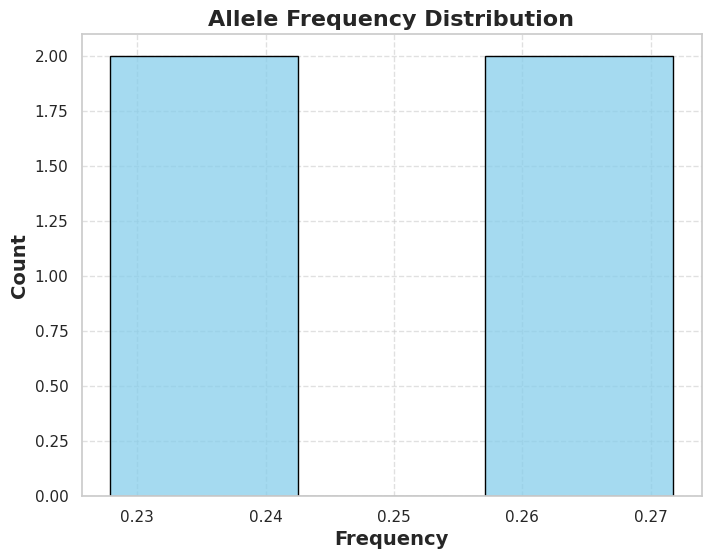

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from prettytable import PrettyTable

# Load SNP data from a CSV file
snp_data = pd.read_csv("/content/snp_data.csv")

# Display the first few rows to understand the data structure
print("\nFirst few rows of SNP data:")
print(snp_data.head())

# Count the occurrence of each allele (reference and alternate)
alleles = snp_data['Reference Allele'].tolist() + snp_data['Alternate Allele'].tolist()
allele_counts = Counter(alleles)

# Calculate allele frequencies
total_alleles = sum(allele_counts.values())
allele_frequencies = {allele: count / total_alleles for allele, count in allele_counts.items()}

# Print allele frequencies in a table format
print("\nAllele Frequencies:")
table = PrettyTable()
table.field_names = ["Allele", "Count", "Frequency"]
for allele, count in allele_counts.items():
    frequency = allele_frequencies[allele]
    table.add_row([allele, count, f"{frequency:.4f}"])
print(table)

# Plot allele frequency distribution with enhanced visuals
plt.figure(figsize=(8, 6))
sns.histplot(list(allele_frequencies.values()), kde=False, color='skyblue', edgecolor='black')
plt.title("Allele Frequency Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Frequency", fontsize=14, fontweight='bold')
plt.ylabel("Count", fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [72]:
window_size = 100  # Adjust based on your preference
density = [0] * (len(seq1) // window_size + 1)
for pos, _, _ in snps:
    density[pos // window_size] += 1
print(density)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
